# import

In [3]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

import seaborn as sns
print('pandas', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# figure에 한글 폰트 사용을 위한 코드
# plt.rc("font", family="Malgun Gothic") # window
plt.rc("font", family="AppleGothic") # mac
from matplotlib.ticker import MaxNLocator

python 3.10.16 (main, Dec  3 2024, 17:27:57) [Clang 16.0.0 (clang-1600.0.26.4)]
numpy 1.26.4
pandas 2.2.3
matplotlib 3.10.0
pandas 0.13.2


# 과제1

## 문제1
* 주어진 df1에 아래 4개의 각 과정을 수행한 결과(df_res)를 출력하고, df_res를 아래와 같이 다중그래프로 나타내시오
* 1) "분양가격" column 전체를 float형으로 변경하시오 (단, "\_"이 포함되어있는 값들에 대해서, "\_"를 제거하고, float형으로 변경하시오)
* 2) "전용면적"이 "전체"인 행을 제거하시오
* 3) "전용면적"이 '\~60', "60\~85" 은 'small'로 '85\~102','102\~'은 'large'로 값을 변경하시오
* 4) 지역별, 전용면적 별로 그룹을 만들고 각 그룹의 분양가격의 평균보다 큰 분양가격들 중에 최소 평당분양가격을 구하시오 ==> df_res

## original df1


,지역명,연도,월,분양가격,전용면적
0,전남,2022,5,10157.4,60~85
1,전남,2022,11,11107.8,~60
2,광주,2020,6,14127.3,102~
3,광주,2020,7,15213.0,85~102
4,전남,2020,6,12292_,102~
...,...,...,...,...,...
95,전남,2021,10,9886.8,전체
96,충북,2021,7,9075.0,102~
97,광주,2019,8,12276.0,60~85
98,광주,2020,8,12190.199999999999,전체


## step1


,지역명,연도,월,분양가격,전용면적
0,전남,2022,5,10157.4,60~85
1,전남,2022,11,11107.8,~60
2,광주,2020,6,14127.3,102~
3,광주,2020,7,15213.0,85~102
4,전남,2020,6,12292.0,102~
...,...,...,...,...,...
95,전남,2021,10,9886.8,전체
96,충북,2021,7,9075.0,102~
97,광주,2019,8,12276.0,60~85
98,광주,2020,8,12190.2,전체


## step2


,지역명,연도,월,분양가격,전용면적
0,전남,2022,5,10157.4,60~85
1,전남,2022,11,11107.8,~60
2,광주,2020,6,14127.3,102~
3,광주,2020,7,15213.0,85~102
4,전남,2020,6,12292.0,102~
...,...,...,...,...,...
92,충북,2020,4,7887.0,60~85
94,광주,2019,12,12955.8,~60
96,충북,2021,7,9075.0,102~
97,광주,2019,8,12276.0,60~85


## step3


,지역명,연도,월,분양가격,전용면적
0,전남,2022,5,10157.4,small
1,전남,2022,11,11107.8,small
2,광주,2020,6,14127.3,large
3,광주,2020,7,15213.0,large
4,전남,2020,6,12292.0,large
...,...,...,...,...,...
92,충북,2020,4,7887.0,small
94,광주,2019,12,12955.8,small
96,충북,2021,7,9075.0,large
97,광주,2019,8,12276.0,small


## step4


전용면적,large,small
지역명,,
광주,15074.0,12747.9
전남,10431.0,9794.4
충북,9075.0,8550.3


## 다중그래프 그리기


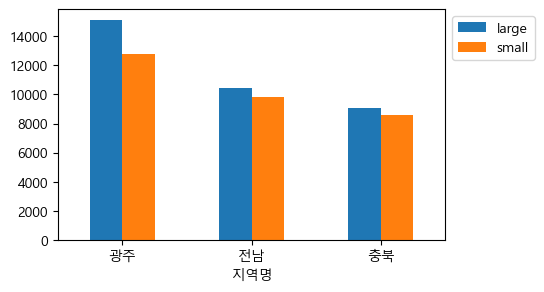

In [5]:
df1=pd.read_table('data/proj1_data.txt', index_col=0)
print('## original df1')
df1

print('## step1')
## 코드작성
df1

print('## step2')
## 코드작성
df2

print('## step3')
df2=df2.copy()
df2['전용면적']=df2['전용면적'].replace({'~60': 'small', '60~85': 'small', '85~102': 'large', '102~': 'large'})
df2

print('## step4')
## 코드작성
df_res

print('## 다중그래프 그리기')
fig=plt.figure(figsize=(5,3))
ax1 = fig.subplots()

_=df_res.plot.bar(ax=ax1, rot=0)
_=ax1.legend(bbox_to_anchor=(1,1), loc='upper left')


## 문제2
* barplot (errorbar: ci)
* ax1에 barplot의 errorbar parameter를 사용하여 errorbar ci를 그렸다.
* ax2에는 errorbar parameter를 사용하지 않아서 errorbar ci가 없다.
* 직접 errorbar ci 를 추가하시오
* 참고: 6w 실습4

In [7]:
####### df_2023 전처리하기
df_2023 = pd.read_csv("data/전국평균 분양가격 (2015년10월~2023년6월).csv", encoding="cp949") #default: sep=','
df_2023.head()
df_2023.info()

### ==> 1) '분양가격(제곱미터)'column: nan(결측치) 제거
df_2023_nn=df_2023.loc[df_2023['분양가격(제곱미터)'].notnull()]

# ### ==> 2) '분양가격(제곱미터)'column: 숫자로 구성된 문자 -> float형 | 숫자가 아닌 문자 -> nan으로 변경 후 행 제거
df_2023_ft=df_2023_nn.copy()
df_2023_ft['분양가격(제곱미터)']=pd.to_numeric(df_2023_ft['분양가격(제곱미터)'], errors='coerce')
df_2023_ft=df_2023_ft.loc[df_2023_ft['분양가격(제곱미터)'].notnull()]

### ==> 3) '분양가격(제곱미터)'을  '평당분양가격'으로 변환하기 (단 column이름은 '분양가격') (참고: 3w자료에서는 평당분양가격임)
df_2023_ft["분양가격"]=df_2023_ft['분양가격(제곱미터)'] * 3.3
df_prep=df_2023_ft.drop(columns=['분양가격(제곱미터)'])

### ==> 4) '규모구분'을 '전용면적'으로 변환하기
def parse_area_only(x):
    x2=x.replace("모든면적", "전체").replace("전용면적", "").replace("제곱미터", "").replace("60이하", "~60")
    x3=x2.replace("초과", "~").replace("이하", "").replace(" ", "")
    return x3
    
df_prep["전용면적"] = df_prep["규모구분"].map(parse_area_only)
df_prep=df_prep.drop(columns=['규모구분'], errors='ignore') # '규모구분' column이 없는 경우 error raise 방지

## ==> 5) reset_index 후 전처리한 데이터 확인하기
df_prep=df_prep.reset_index(drop=True)

df_prep.head()
df_prep.info()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         7905 non-null   object
 1   규모구분        7905 non-null   object
 2   연도          7905 non-null   int64 
 3   월           7905 non-null   int64 
 4   분양가격(제곱미터)  7358 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.9+ KB


,지역명,연도,월,분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     7322 non-null   object 
 1   연도      7322 non-null   int64  
 2   월       7322 non-null   int64  
 3   분양가격    7322 non-null   float64
 4   전용면적    7322 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 286.1+ KB


<Axes: xlabel='연도', ylabel='분양가격'>

<Axes: xlabel='연도', ylabel='분양가격'>

,up,lw
연도,,
2015,9620.976173,8823.294198
2016,9903.936021,9471.368986
2017,10612.251269,10158.393300
2018,11231.145041,10732.896121
2019,12528.734408,11851.571332
2020,13394.544073,12722.274209
2021,13981.770262,13328.674857
2022,15229.499663,14623.358848
2023,16830.355109,15813.101071


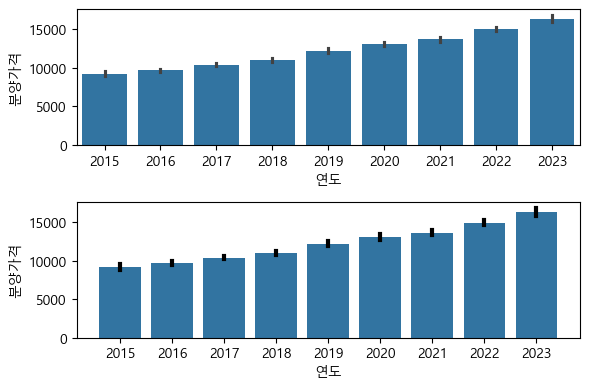

In [8]:
fig=plt.figure(figsize=(6, 4))
ax1, ax2=fig.subplots(2,1)

## ax1 (errorbar by parameter)
sns.barplot(data=df_prep,
            x='연도', # group
            y="분양가격",
            errorbar=('ci',90), # bootstraping confidence interval: 5~95 
            ax=ax1)

## ax2 (errorbar by yourself)
sns.barplot(data=df_prep,
            x='연도', # group
            y="분양가격",
            errorbar=None,
            ax=ax2)

#############
## 코드작성 ##
#############

## draw errorbar
for x_pos, ind in zip(ax2.get_xticks(), ci_res.index):
    up_pos=ci_res.loc[ind, 'up']
    lw_pos=ci_res.loc[ind, 'lw']
    
    _=ax2.plot([x_pos,x_pos],[lw_pos, up_pos], color='k', linewidth=3)
    
fig.tight_layout()